In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [97]:
df=pd.read_csv(r"C:\Users\User\Documents\BK trains.csv")
df.head(100)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dealer,0,0,3,BHK,1200.082764,1,1,"Satgachi,Kolkata",23.207157,88.404471,58.0
96,Dealer,0,0,2,BHK,1584.283904,1,1,"Tilak Nagar,Kanpur",26.459137,79.506922,100.0
97,Owner,0,0,2,BHK,900.000000,1,1,"Kalol,Gandhinagar",23.225700,72.516790,18.0
98,Dealer,0,1,2,BHK,1193.440032,1,1,"Talegaon,Pune",18.441256,74.647361,60.4


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           29451 non-null  object 
 1   UNDER_CONSTRUCTION  29451 non-null  int64  
 2   RERA                29451 non-null  int64  
 3   BHK_NO              29451 non-null  int64  
 4   BHK_OR_RK           29451 non-null  object 
 5   SQUARE_FT           29451 non-null  float64
 6   READY_TO_MOVE       29451 non-null  int64  
 7   RESALE              29451 non-null  int64  
 8   ADDRESS             29451 non-null  object 
 9   LONGITUDE           29451 non-null  float64
 10  LATITUDE            29451 non-null  float64
 11  PRICE               29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [99]:
df.nunique()

POSTED_BY                 3
UNDER_CONSTRUCTION        2
RERA                      2
BHK_NO                   16
BHK_OR_RK                 2
SQUARE_FT             19561
READY_TO_MOVE             2
RESALE                    2
ADDRESS                6899
LONGITUDE              4087
LATITUDE               4078
PRICE                  1172
dtype: int64

In [100]:
pd.isnull(df).sum() 

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO                0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
PRICE                 0
dtype: int64

In [101]:
df1 = df.drop(columns=['ADDRESS',"BHK_OR_RK"])

In [102]:
df1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [103]:
df2 = pd.get_dummies(df1,columns=["POSTED_BY"])

In [104]:
df2.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0,1
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0,1
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,1,0


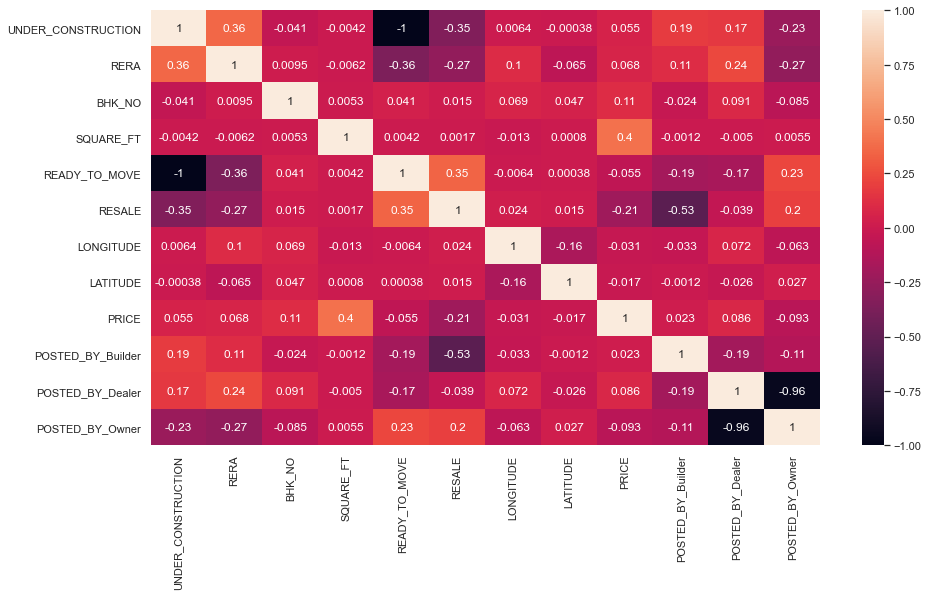

In [105]:
corrMatrix = df2.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [106]:
df2.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'PRICE', 'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner'],
      dtype='object')

In [107]:
df3=df2[['BHK_NO','SQUARE_FT','PRICE']]
df3

,BHK_NO,SQUARE_FT,PRICE
0,2,1300.236407,55.0
1,2,1275.000000,51.0
2,2,933.159722,43.0
3,2,929.921143,62.5
4,2,999.009247,60.5
...,...,...,...
29446,3,2500.000000,45.0
29447,2,769.230769,16.0
29448,2,1022.641509,27.1
29449,2,927.079009,67.0


In [108]:
df3.PRICE.value_counts()

110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
1890.0      1
248.0       1
1.5         1
7390.0      1
810.0       1
Name: PRICE, Length: 1172, dtype: int64

In [109]:
df3.shape

(29451, 3)

In [110]:
Q1=df3.PRICE.quantile(0.25)
Q3=df3.PRICE.quantile(0.75)
IQR=Q3-Q1
print(IQR)
df4=df3[~((df3.PRICE<(Q1-1.5*IQR))|(df3.PRICE>(Q1+1.5*IQR)))]

62.0


In [111]:
Q1=df3.SQUARE_FT.quantile(0.25)
Q3=df3.SQUARE_FT.quantile(0.75)
IQR=Q3-Q1
print(IQR)
df4=df3[~((df3.SQUARE_FT<(Q1-1.5*IQR))|(df3.SQUARE_FT>(Q1+1.5*IQR)))]

650.6669944


In [112]:
Q1=df3.BHK_NO.quantile(0.25)
Q3=df3.BHK_NO.quantile(0.75)
IQR=Q3-Q1
print(IQR)
df4=df3[~((df3.BHK_NO<(Q1-1.5*IQR))|(df3.BHK_NO>(Q1+1.5*IQR)))]

1.0


In [113]:
x = df4.drop(columns=["PRICE"])
y = df4[["PRICE"]]
x.head()


,BHK_NO,SQUARE_FT
0,2,1300.236407
1,2,1275.000000
2,2,933.159722
3,2,929.921143
4,2,999.009247


In [114]:

#df4["PRICE"]=df4["PRICE"].astype(int)


In [115]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train[0:10,  :])

[[-0.37510066 -0.00856552]
 [-1.86296606 -0.00950151]
 [-0.37510066 -0.00811527]
 [ 1.11276474 -0.00832462]
 [-0.37510066 -0.00839403]
 [-1.86296606 -0.0091614 ]
 [-0.37510066 -0.00861021]
 [-1.86296606 -0.00925294]
 [ 1.11276474 -0.00650954]
 [-1.86296606 -0.00909694]]


In [116]:
#from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor(n_estimators=29451, n_jobs=4)
from sklearn.tree import DecisionTreeRegressor
rf=DecisionTreeRegressor(random_state=0)

In [117]:
rf.fit(x_train,y_train)


DecisionTreeRegressor(random_state=0)

In [118]:
train=rf.score
train(x_train,y_train)

0.9876732555970746

In [119]:
pred = rf.predict(x_test)
pred

array([ 84.5  ,  62.5  ,  50.   , ...,  42.   ,  12.5  , 110.675])

In [120]:
rf.score(x_train,y_train)


0.9876732555970746

In [121]:
rf.score(x_test,y_test)

0.9209488704461631

In [122]:
import math
from sklearn.metrics import mean_squared_error
from math import sqrt

In [123]:
MSE=sqrt(mean_squared_error(y_test,pred))
MSE

213.0698207147048

In [124]:
RMSE=math.sqrt(MSE)
RMSE

14.596911341605963